# Distance Correlation (dCor)

The distance correlation measures the strength of association between variables regardless of its nature (linear, nonlinear, monotonic, etc.). This makes it really useful for UX research as we typically encounter things like:
- Saturation effects, such as when satisfaction plateaus after a certain number of steps in a product walkthru.
- Threshold effects, like certain emotional reactions spiking after a certain amount of events.
- Curvilinear relationships, like engagement vs. time pressure in work environments.

So let me explain the core idea a bit more clearly. dCor is defined via a pairwise distance matrix. Meaning you would start out by calculating the Euclidean pairwise distances between all observations in X and Y of your data set. Then you would double center the distance matrices, which is a distance matrix with it's row means and column means removed, but the grand mean added back in. This removes the average structure and leaves only the interaction structure. Then you compute the weighted sum of products for the centered distances.

That looks a bit like this:

$dCor = \frac{dCov(X,Y)}{\sqrt{dCov(X,X) \cdot dCov(Y,Y)}}$

__Interpretation__

Unlike other correlations presented in this section, dCor is bounded within the range of [0,1]. It captures strength only.

| dCor Value | Interpretation |
|------------|----------------|
| 0.0        | Not statistically dependent |
| 0.1 to 0.3 | weak dependence |
| 0.3 to 0.5 | Moderate dependence |
| 0.5 to 1.0 | Strong dependence |

__Assumptions__
1. Both variables are either continuous or ordinal with high granularity.
   - By high granularity, think of a scale like 0 to 10.
2. Variance is finite.
3. Sample sizes on both variables are the same.

Unlike some other correlation measures, such as Pearson's r, there is no assumption of linearity, normality, or homogeneity of variance.

## Python Example

dCor can be calculated using the Python library [dcor](https://dcor.readthedocs.io/en/stable/index.html).

In [2]:
# If you need to install dcor, uncomment the line below
#!pip install dcor

If you're installing via conda, use this:   
```conda install -c conda-forge dcor```

In [4]:
# Import
import numpy as np
import pandas as pd

# dcor
import dcor

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

For a scenario, imagine the following:

You have data for 150 users who have completed the first time walkthrough of a new product feature that has 12 tooltips. At the end, each user rated their satisfaction on a scale of 0 to 10.

In [9]:
# Import a dataset
df = pd.read_csv('/content/drive/MyDrive/Data Science for UX/data_science_for_ux/correlations/SaturationDataset.csv')

# View
df.head()

,tooltips_viewed,satisfaction
0,6,6.252990
1,3,3.627367
2,12,3.508099
3,10,5.266314
4,7,4.895426


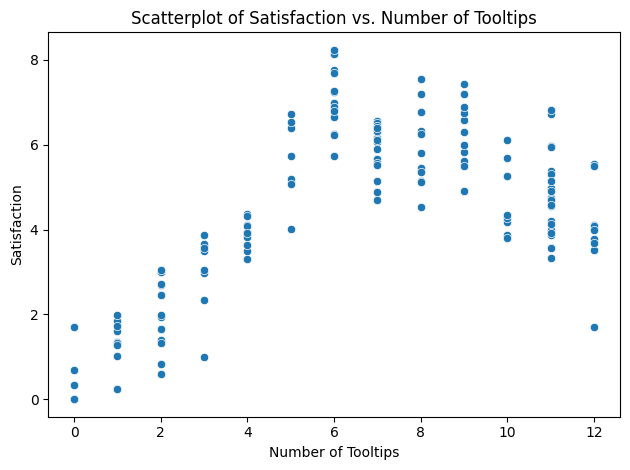

In [11]:
# Scatterplot
sns.scatterplot(data=df, x='tooltips_viewed', y='satisfaction')

plt.title('Scatterplot of Satisfaction vs. Number of Tooltips')
plt.xlabel('Number of Tooltips')
plt.ylabel('Satisfaction')

# Show
plt.tight_layout()
plt.show()

In [12]:
# Run dcor
dcor.distance_correlation(df['tooltips_viewed'], df['satisfaction'])

/usr/local/lib/python3.11/dist-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(int64, 1d, C), array(float64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(


np.float64(0.718689510324405)

So, for our generated dataset, we see a dCor of ~0.7187, which is pretty strong.

Getting at statistical significance is a bit more difficult in Python, though. It has to be done via a permutation test, which is a type of non-parametric bootstrapping.

In [17]:
# Isolate your x and y variables
x = df['tooltips_viewed']
y = df['satisfaction']

# Permutations
n_perm = 1000
perm_corrs = []

# Iterate n_perm
for _ in range(n_perm):
  # Y permuted
  y_perm = np.random.permutation(y)
  # Calculate dCor
  perm_corrs.append(dcor.distance_correlation(x, y_perm))

# Compute the p-value
p_value = np.mean(np.abs(perm_corrs) >= np.abs(dcor.distance_correlation(x, y)))

# print
print(f'dCor: {dcor.distance_correlation(x, y)}')
print(f'p-value: {p_value}')

dCor: 0.718689510324405
p-value: 0.0


From the above example, we can see that our dCor value is statistically significant at an alpha level of 0.05 (p = 0.0).